In [ ]:
#Usaremos APIs para encontrar vuelos a París y Berlín

In [2]:
import pandas as pd
import requests
import dotenv
import os
from dotenv import load_dotenv

import sys
sys.path.append("../")
from src import soporte

In [14]:
load_dotenv()
rapidapi_token = os.getenv("token")

In [112]:
import requests

url = "https://sky-scrapper.p.rapidapi.com/api/v1/getLocale"

headers = {
	"x-rapidapi-key": "42eebb4469msh21e53e3d185ba4bp18b67cjsn5479efdc2c4b",
	"x-rapidapi-host": "sky-scrapper.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

dic_ids = response.json()

In [ ]:
dic_ids

In [45]:
#Buscamos información de los países en la API
url = "https://sky-scrapper.p.rapidapi.com/api/v1/getConfig"

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "sky-scrapper.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

info_rapiadpi = (response.json())

In [ ]:
#Diccionario con la información de los paises
info_rapiadpi

datos_dic = info_rapiadpi["data"]

for pais in datos_dic:
    if pais["country"] == "France":
        print (pais)


España tiene el market es-ES
Francia tiene el market fr_FR

In [124]:
#Buscamos información de los aeropuertos españoles en la API

url = "https://sky-scrapper.p.rapidapi.com/api/v1/flights/searchAirport"

querystring = {"query":"Madrid","locale":"es-ES"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "sky-scrapper.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

info_aeropuertos_Madrid = (response.json())

In [126]:
#Buscamos información de los aeropuertos franceses en la API
url = "https://sky-scrapper.p.rapidapi.com/api/v1/flights/searchAirport"

querystring = {"query":"Paris","locale":"fr-FR"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "sky-scrapper.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

info_aeropuertos_france = (response.json())

In [ ]:
info_aeropuertos_Madrid


In [ ]:
datos_aeropuertos_franceses = info_aeropuertos_france["data"]
ids_aer_franceses = []
ids_ent_franceses = []

for info in datos_aeropuertos_franceses:
     print(info["skyId"])
     print(info["entityId"])
     ids_aer_franceses.append(info["skyId"])
     ids_ent_franceses.append(info["entityId"])

dict_a_franc = dict(zip(ids_aer_franceses,ids_ent_franceses))

In [12]:
dict_a_franc = {'PARI': '27539733',
 'CDG': '95565041',
 'ORY': '95565040',
 'BVA': '95566278',
 'LBG': '129053609',
 'MBJ': '99539667',
 'KIN': '99539636',
 'PAS': '104120332'}

In [ ]:
#top 5 vuelos para una familia (2 adultos 2 niños) desde Madrid a París en el penúltimo fin de semana de Noviembre (22-25)
url = "https://sky-scrapper.p.rapidapi.com/api/v2/flights/searchFlightsComplete"

#En madrid sólo hay un aeropuerto importante, barajas, pero en París hay hasta 8. Iteraremos por cada uno
lista_respuestas = []
for key, value in dict_a_franc.items():

    querystring = {"originSkyId":"MAD",
                   "destinationSkyId": key,
                   "originEntityId":"95565077",
                   "destinationEntityId": value,
                   "cabinClass":"economy",
                   "adults":"2",
                   "childrens":"2",
                   "sortBy":"best",
                   "currency":"EUR",
                   "market":"es-ES",
                   "countryCode":"ES",
                   "limit" : "2",
                   "date" : "2024-11-22",
                   "returnDate": "2024-11-25",
   }

    headers = {
	    "x-rapidapi-key": rapidapi_token,
	    "x-rapidapi-host": "sky-scrapper.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)

    lista_respuestas.append(response.json())
    print(response.json())


In [ ]:
respuestas = []
# Obtener respuestas desde "data" solo si la clave "data" existe
for i in lista_respuestas:
    if "data" in i:
        respuestas.append(i["data"])
    else:
        print(f"Clave 'data' no encontrada en el elemento: {i}")  # Mensaje de depuración

precio_vuelo = []
origen_vuelo = []
destino_vuelo = []

# Iterar sobre la lista de respuestas
for i in range(len(respuestas)):  # Ajusta el rango al tamaño de las respuestas
    itineraries = respuestas[i].get('itineraries', [])  # Si no existen itinerarios, regresa lista vacía
    for itinerary in itineraries:
        price_raw = itinerary['price']['raw']  # Precio bruto
        price_formatted = itinerary['price']['formatted']  # Precio formateado
        precio_vuelo.append(price_formatted)
        
        legs = itinerary['legs']
        for leg in legs:
            # Acceder a los aeropuertos de origen y destino
            origin_airport = leg['origin']['name']
            destination_airport = leg['destination']['name']
            origen_vuelo.append(origin_airport)
            destino_vuelo.append(destination_airport)

# Verificar las listas generadas
print(precio_vuelo)
print(origen_vuelo)
print(destino_vuelo)


In [ ]:
# Crear el diccionario combinando las tres listas
diccionario_vuelos_familia = {}

for origen, destino, precio in zip(origen_vuelo, destino_vuelo, precio_vuelo):
    # Verifica si el aeropuerto de origen ya está en el diccionario
    if origen not in diccionario_vuelos_familia:
        diccionario_vuelos_familia[origen] = []  # Si no existe, inicializa con una lista vacía
    
    # Añade el destino y precio como una tupla a la lista del aeropuerto de origen
    diccionario_vuelos_familia[origen].append((destino, precio))

# Ver el diccionario resultante
print(diccionario_vuelos_familia.keys())


In [ ]:
series_vuelos_familia = pd.Series(diccionario_vuelos_familia)
# Lista para almacenar los datos
data = []

# Iterar sobre las series
for origen, vuelos in series_vuelos_familia.items():
    for destino, precio in vuelos:
        # Añadir una fila por cada vuelo
        data.append([origen, destino, precio])

# Crear el DataFrame con las columnas Origen, Destino y Precio
df_vuelos_familia = pd.DataFrame(data, columns=['Origen', 'Destino', 'Precio'])

# Ver el DataFrame resultante
df_vuelos_familia

In [ ]:
#Para una pareja romántica. Mismas fechas

dic_vuelos_pareja = soporte.vuelos_aeropuertos_franceses(2)


In [ ]:
series_vuelos_pareja = pd.Series(dic_vuelos_pareja)
# Lista para almacenar los datos
data = []

# Iterar sobre las series
for origen, vuelos in series_vuelos_pareja.items():
    for destino, precio in vuelos:
        # Añadir una fila por cada vuelo
        data.append([origen, destino, precio])

# Crear el DataFrame con las columnas Origen, Destino y Precio
df_vuelos = pd.DataFrame(data, columns=['Origen', 'Destino', 'Precio'])

# Ver el DataFrame resultante
df_vuelos

In [27]:
df_vuelos

,Origen,Destino,Precio
0,Madrid,Paris Orly,315 €
1,Madrid,Paris Beauvais,183 €
2,Madrid,Paris Beauvais,315 €
3,Madrid,Paris Orly,236 €
4,Madrid,Paris Orly,235 €
...,...,...,...
2805,Paris Charles de Gaulle,Madrid,"1,678 €"
2806,Paris Charles de Gaulle,Madrid,"1,235 €"
2807,Paris Charles de Gaulle,Madrid,"1,240 €"
2808,Paris Charles de Gaulle,Madrid,"1,098 €"


In [ ]:
#Para un aventurero
dic_aventura = soporte.vuelos_aeropuertos_franceses(1)

In [28]:
def crear_series_vuelos(diccionario_precio): 
    series_dicc = pd.Series(diccionario_precio)
# Lista para almacenar los datos
    data = []

# Iterar sobre las series
    for origen, vuelos in series_dicc.items():
        for destino, precio in vuelos:
        # Añadir una fila por cada vuelo
            data.append([origen, destino, precio])

# Crear el DataFrame con las columnas Origen, Destino y Precio
    df_dicc = pd.DataFrame(data, columns=['Origen', 'Destino', 'Precio'])

# Ver el DataFrame resultante
    return df_dicc

In [29]:
df_aventura = crear_series_vuelos(dic_aventura)
df_aventura

,Origen,Destino,Precio
0,Madrid,Paris Orly,158 €
1,Madrid,Paris Beauvais,111 €
2,Madrid,Paris Beauvais,170 €
3,Madrid,Paris Charles de Gaulle,170 €
4,Madrid,Paris Charles de Gaulle,118 €
...,...,...,...
1948,Paris Charles de Gaulle,Madrid,427 €
1949,Paris Charles de Gaulle,Madrid,566 €
1950,Paris Charles de Gaulle,Madrid,532 €
1951,Paris Charles de Gaulle,Madrid,895 €


In [ ]:
#Para un grupo de 5 amigos:
dic_amigos = soporte.vuelos_aeropuertos_franceses(5)


In [30]:
df_amigos = crear_series_vuelos(dic_amigos)
df_amigos

,Origen,Destino,Precio
0,Madrid,Paris Orly,790 €
1,Madrid,Paris Beauvais,950 €
2,Madrid,Paris Orly,"1,004 €"
3,Madrid,Paris Charles de Gaulle,"1,081 €"
4,Madrid,Paris Charles de Gaulle,"1,081 €"
...,...,...,...
635,Paris Charles de Gaulle,Madrid,"2,171 €"
636,Paris Charles de Gaulle,Madrid,"3,143 €"
637,Paris Charles de Gaulle,Madrid,"2,531 €"
638,Paris Charles de Gaulle,Madrid,"3,406 €"


In [ ]:
#Entendemos que un turista eco-responsable viajará igual que el aventurero singular, aunque eligiendo el viaje más corto y eco-responsable (y más caro).

In [ ]:
#EDA

In [ ]:
#Para la familia:

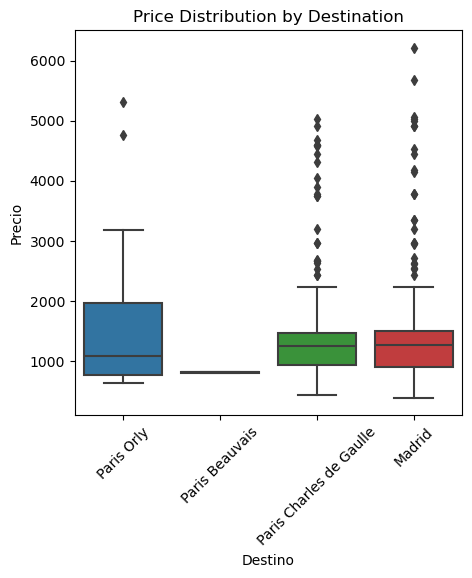

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Precio' to numeric after removing '€' and commas
df_vuelos_familia['Precio'] = df_vuelos_familia['Precio'].replace('€', '').replace(',', '').astype(float)

# Boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Destino', y='Precio', data=df_vuelos_familia)
plt.title('Price Distribution by Destination')
plt.xticks(rotation=45)
plt.show()


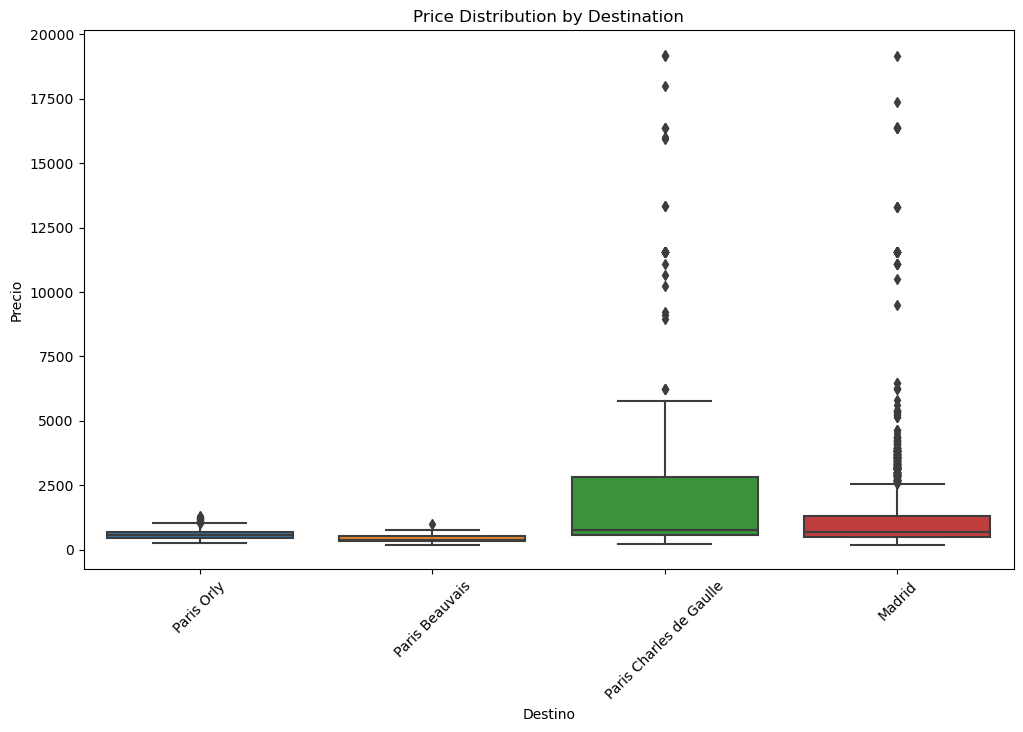

In [54]:
#Para pareja
# Convert 'Precio' to numeric after removing '€' and commas
df_vuelos['Precio'] = df_vuelos['Precio'].replace('€', '').replace(',', '').astype(float)

# Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Destino', y='Precio', data=df_vuelos)
plt.title('Price Distribution by Destination')
plt.xticks(rotation=45)
plt.show()


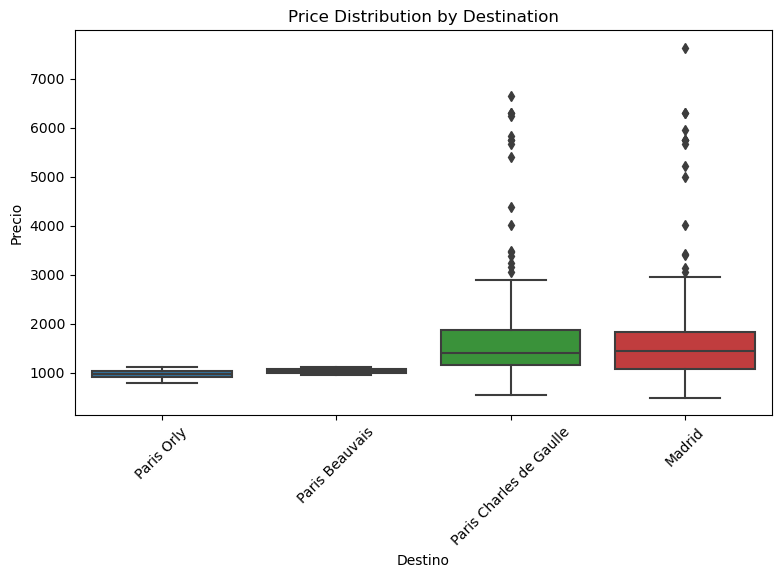

In [59]:
# Convert 'Precio' to numeric after removing '€' and commas
df_amigos['Precio'] = df_amigos['Precio'].replace('€', '').replace(',', '').astype(float)

# Boxplot
plt.figure(figsize=(9, 5))
sns.boxplot(x='Destino', y='Precio', data=df_amigos)
plt.title('Price Distribution by Destination')
plt.xticks(rotation=45)
plt.show()


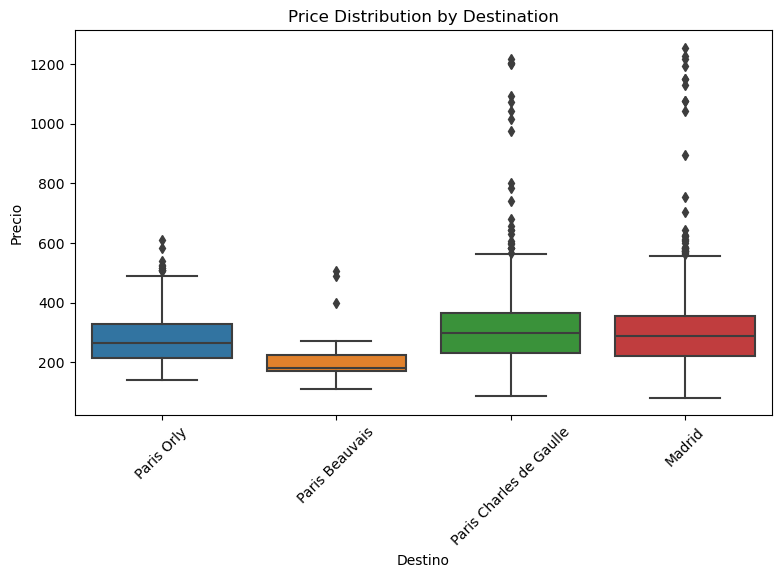

In [61]:
#Para viajero solitario: 

# Convert 'Precio' to numeric after removing '€' and commas
df_aventura['Precio'] = df_aventura['Precio'].str.replace('€', '').str.replace(',', '').astype(float)

# Boxplot
plt.figure(figsize=(9, 5))
sns.boxplot(x='Destino', y='Precio', data=df_aventura)
plt.title('Price Distribution by Destination')
plt.xticks(rotation=45)
plt.show()


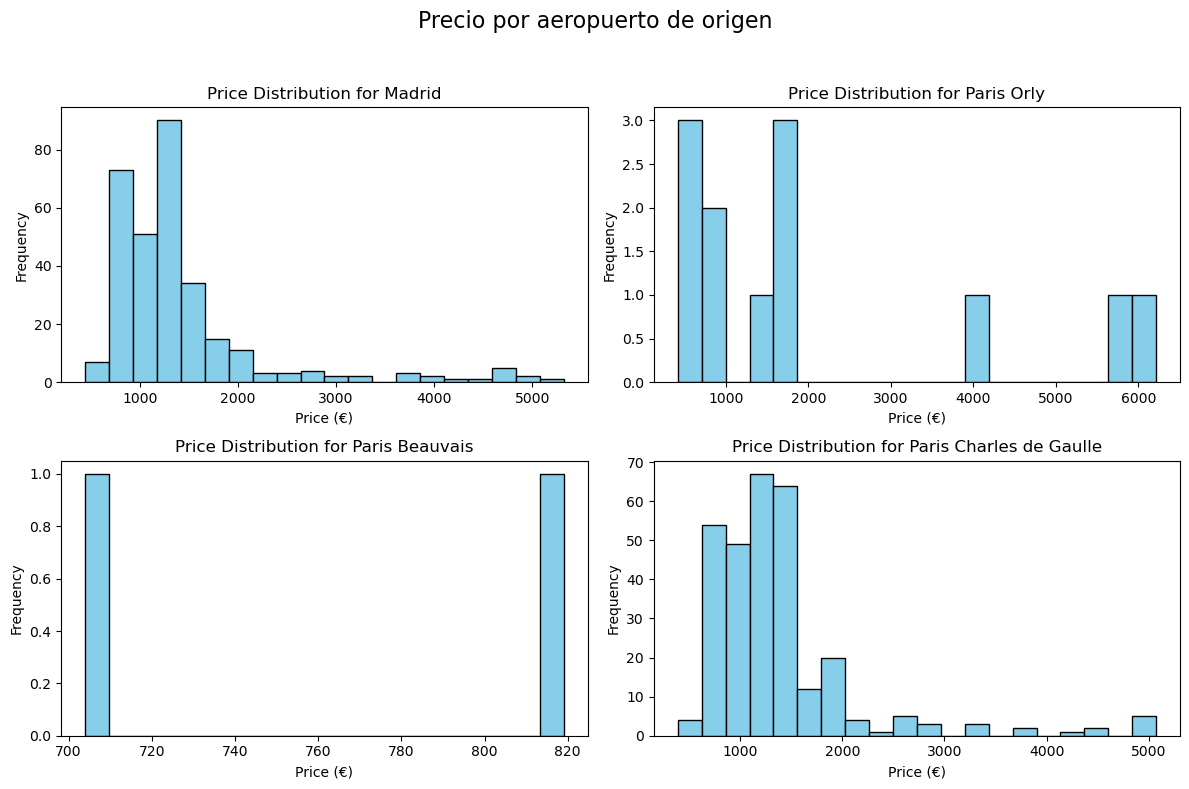

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los destinos únicos
origenes = df_vuelos_familia['Origen'].unique()

# Crear una figura para múltiples subplots
plt.figure(figsize=(12, 8))

# Generar subplots para cada destino
for i, origen in enumerate(origenes):
    plt.subplot(2, 2, i+1)  # Ajustar la disposición de la cuadrícula (en este caso, 2x2)
    df_destino = df_vuelos_familia[df_vuelos_familia['Origen'] == origen]
    plt.hist(df_destino['Precio'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Price Distribution for {origen}')
    plt.xlabel('Price (€)')
    plt.ylabel('Frequency')

# Añadir el título general para todos los gráficos
plt.suptitle('Precio por aeropuerto de origen para familia', fontsize=16)

# Ajustar el espaciado entre los subplots y el título
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar el gráfico
plt.show()


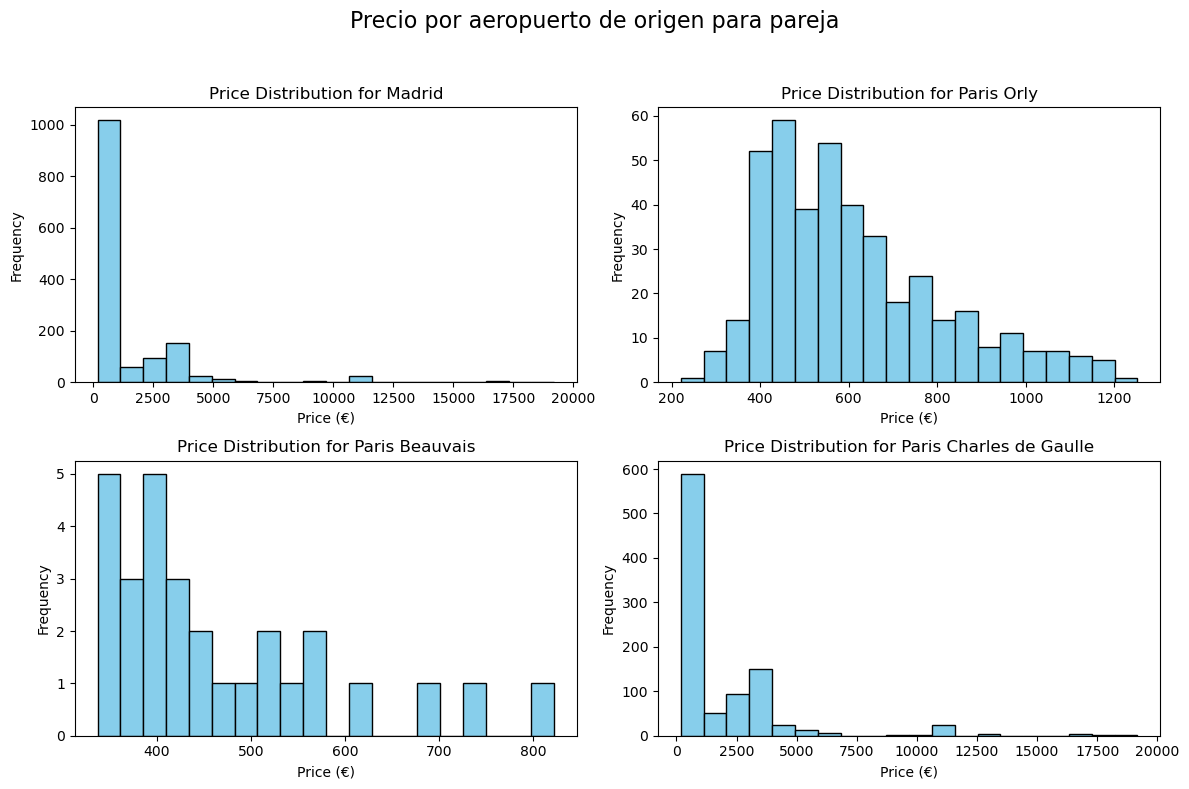

In [74]:
#Parejas
# Obtener los destinos únicos 
origenes = df_vuelos['Origen'].unique()

# Crear una figura para múltiples subplots
plt.figure(figsize=(12, 8))

# Generar subplots para cada destino
for i, origen in enumerate(origenes):
    plt.subplot(2, 2, i+1)  # Ajustar la disposición de la cuadrícula (en este caso, 2x2)
    df_destino = df_vuelos[df_vuelos['Origen'] == origen]
    plt.hist(df_destino['Precio'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Price Distribution for {origen}')
    plt.xlabel('Price (€)')
    plt.ylabel('Frequency')

# Añadir el título general para todos los gráficos
plt.suptitle('Precio por aeropuerto de origen para pareja', fontsize=16)

# Ajustar el espaciado entre los subplots y el título
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar el gráfico
plt.show()

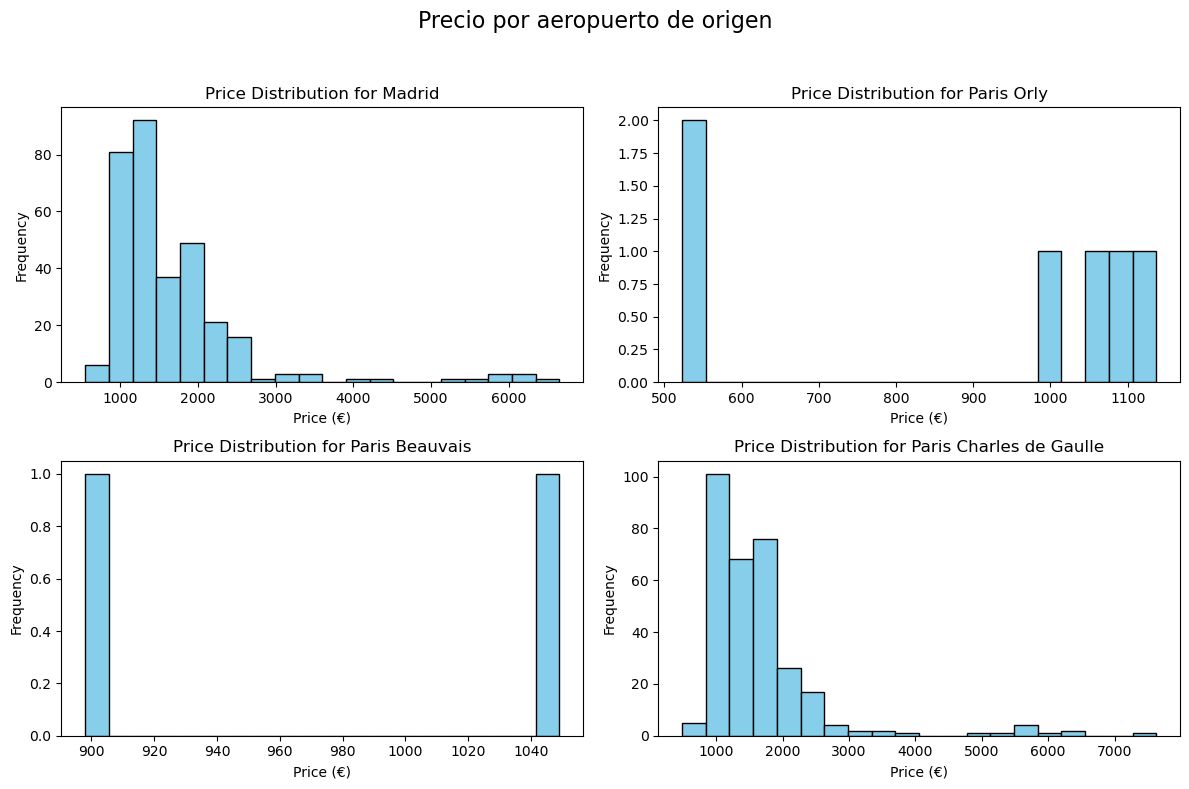

In [69]:
#Parejas
# Obtener los destinos únicos 
origenes = df_amigos['Origen'].unique()

# Crear una figura para múltiples subplots
plt.figure(figsize=(12, 8))

# Generar subplots para cada destino
for i, origen in enumerate(origenes):
    plt.subplot(2, 2, i+1)  # Ajustar la disposición de la cuadrícula (en este caso, 2x2)
    df_destino = df_amigos[df_amigos['Origen'] == origen]
    plt.hist(df_destino['Precio'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Price Distribution for {origen}')
    plt.xlabel('Price (€)')
    plt.ylabel('Frequency')

# Añadir el título general para todos los gráficos
plt.suptitle('Precio por aeropuerto de origen para amigos', fontsize=16)

# Ajustar el espaciado entre los subplots y el título
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar el gráfico
plt.show()

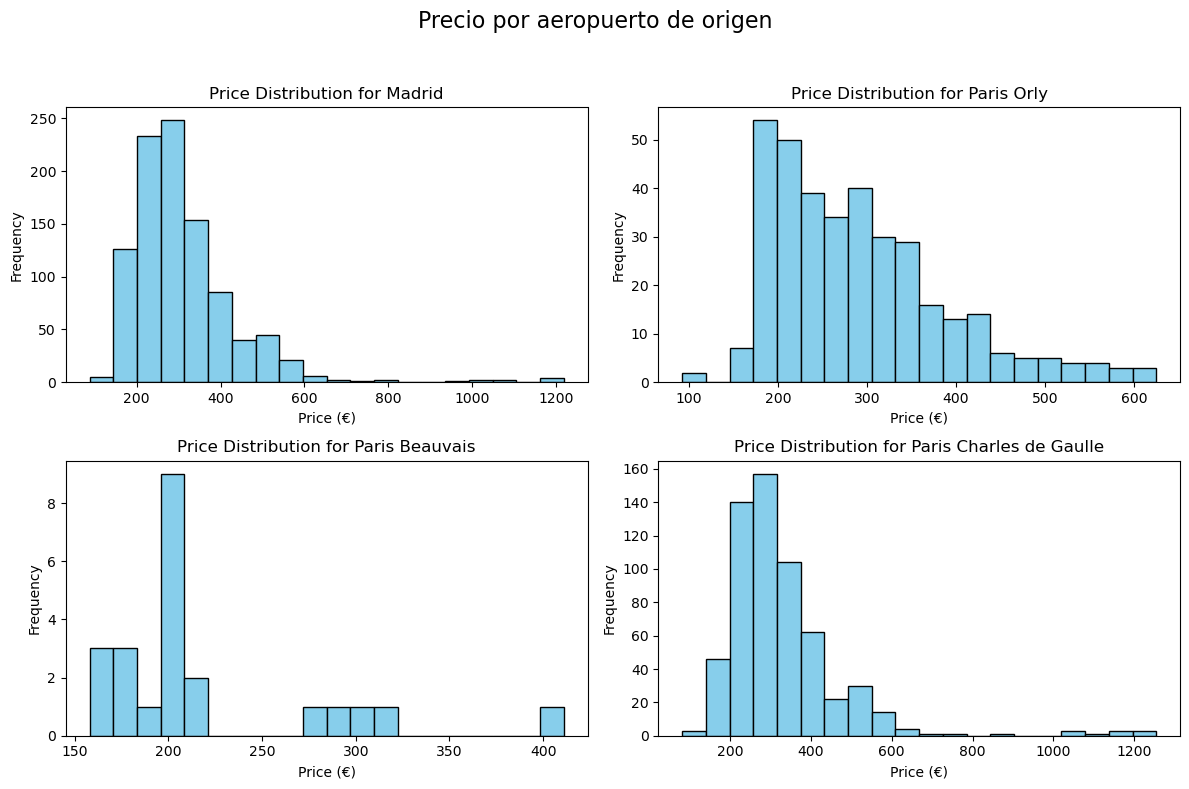

In [70]:
#Parejas
# Obtener los destinos únicos 
origenes = df_aventura['Origen'].unique()

# Crear una figura para múltiples subplots
plt.figure(figsize=(12, 8))

# Generar subplots para cada destino
for i, origen in enumerate(origenes):
    plt.subplot(2, 2, i+1)  # Ajustar la disposición de la cuadrícula (en este caso, 2x2)
    df_destino = df_aventura[df_aventura['Origen'] == origen]
    plt.hist(df_destino['Precio'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Price Distribution for {origen}')
    plt.xlabel('Price (€)')
    plt.ylabel('Frequency')

# Añadir el título general para todos los gráficos
plt.suptitle('Precio por aeropuerto de origen para uno', fontsize=16)

# Ajustar el espaciado entre los subplots y el título
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar el gráfico
plt.show()

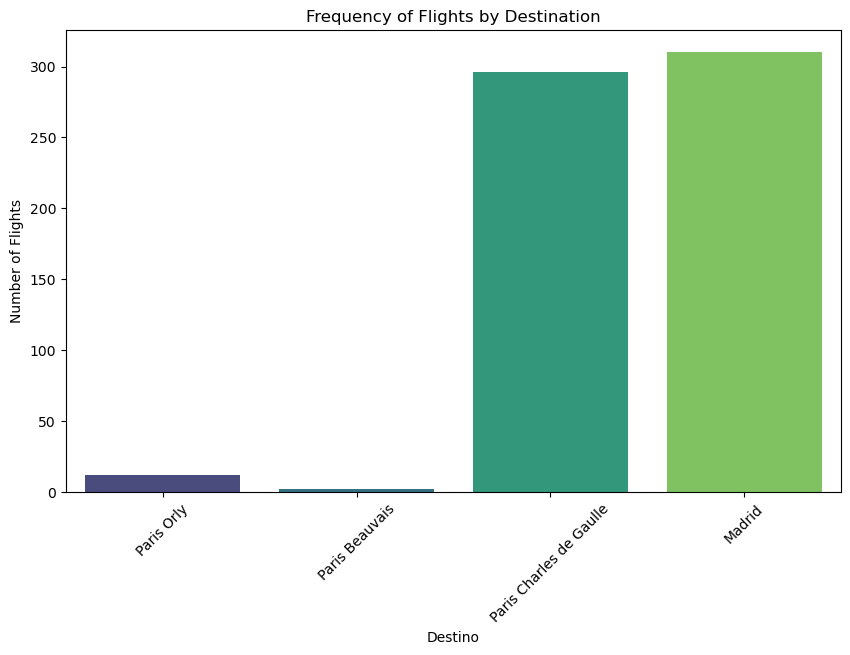

In [38]:
# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Destino', data=df_vuelos_familia, palette='viridis')
plt.title('Frequency of Flights by Destination')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.show()


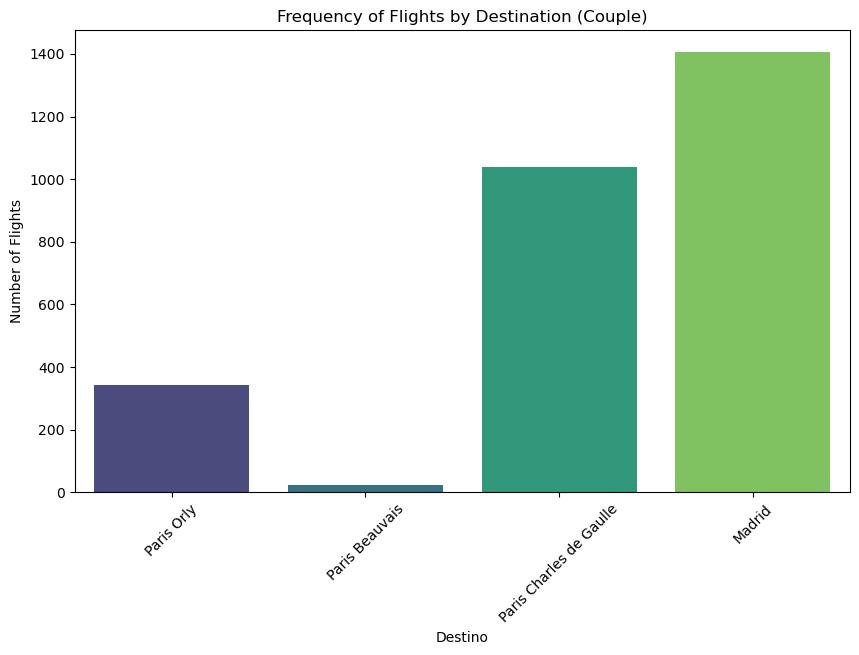

In [71]:
# Countplot pareja
plt.figure(figsize=(10, 6))
sns.countplot(x='Destino', data=df_vuelos, palette='viridis')
plt.title('Frequency of Flights by Destination (Couple)')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.show()


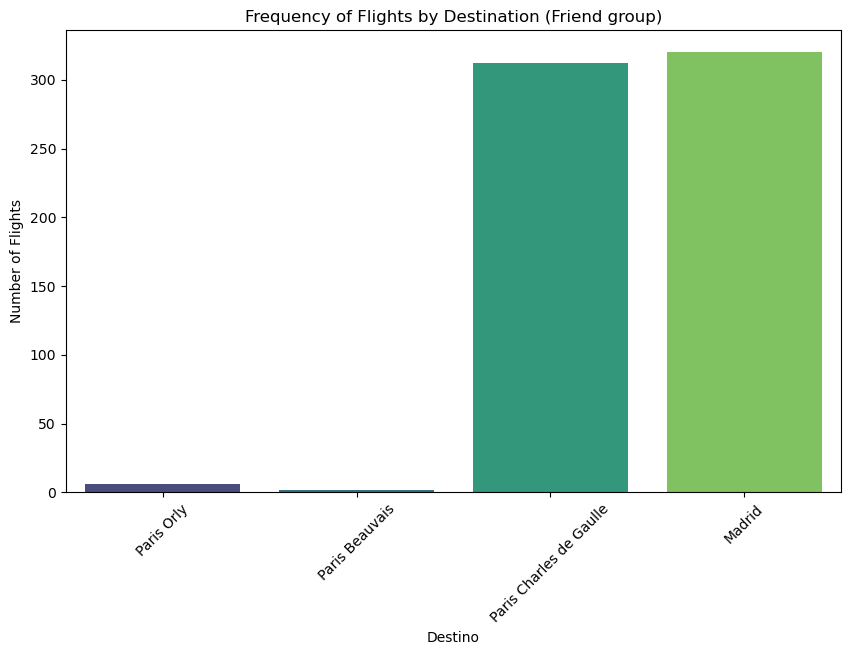

In [72]:
# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Destino', data=df_amigos, palette='viridis')
plt.title('Frequency of Flights by Destination (Friend group)')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.show()


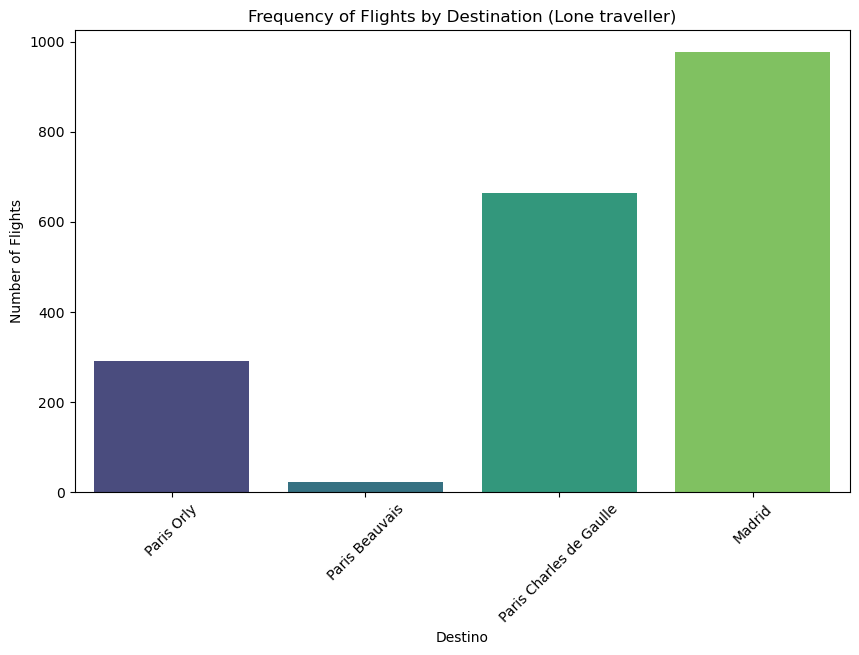

In [75]:
# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Destino', data=df_aventura, palette='viridis')
plt.title('Frequency of Flights by Destination (Lone traveller)')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.show()
